### Linear regression for price prediction over the Boston housing dataset

In [2]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [4]:
# defining function for initializing the weight and bias parameters

def initialize_parameters(n):
    # w->weights
    w=np.random.randn(1, n)
    # b->bias
    b=0
    return w,b

# defining function for forward propagation

def forward_prop(w, X, b):
    z=np.dot(w, X)+b
    return z

# defining function for cost function calculation

def return_cost_function(y, z):
    m=y.shape[1]
    J=(0.5*m)*(np.sum(np.square(y-z)))
    return J

# defining function for backpropagation

def back_prop(X, z, y):
    # returning derivative w.r.t the weights and biases
    # dw=dJ/dw= (dJ/dz) * xT
    dz=(1/y.shape[1])*(z-y) # by chain rule diff to cost function.
    dw=np.dot(dz, X.T)
    db=np.sum(dz)
    return dw, db

# defining function for updating W and B (gradient descent)

def gradient_update(W, B, dw, db, lr):
    W=W-dw*lr
    B=B-db*lr
    return W, B

In [5]:

# defining the linear regression function

def linear_regression(X_train, y_train, X_val, y_yal, lr, epochs):
    n=X_train.shape[0] # number of indpt features in training set
    v=X_val.shape[0] # number of indpt features in validation set
    w, b= initialize_parameters(n)
    
    cost_list_train=[]
    cost_list_val=[]
    
    for i in range(epochs):
        z_train=forward_prop(w, X_train, b)
        cost_train=return_cost_function(y_train, z_train)
        dw, db=back_prop(X_train, z_train, y_train)
        w, b=gradient_update(w, b, dw, db, lr)
        cost_list_train.append(cost_train)
        
        # computing the cost function for the validation dataset
        z_val=forward_prop(w, X_val, b)
        cost_val=return_cost_function(y_val, z_val)
        cost_list_val.append(cost_val)
        
        print("\n\n")
        print("Epoch number:", epoch+1)
        print("Training cost:", cost_train)
        print("Validation cost:", cost_val)
        
    return cost_list_train, cost_list_val
        
        

### EDA on Boston dataset

In [6]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] 

df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names) 

In [7]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0


In [8]:
df.shape

(506, 14)

In [9]:
import seaborn as sns

<AxesSubplot:>

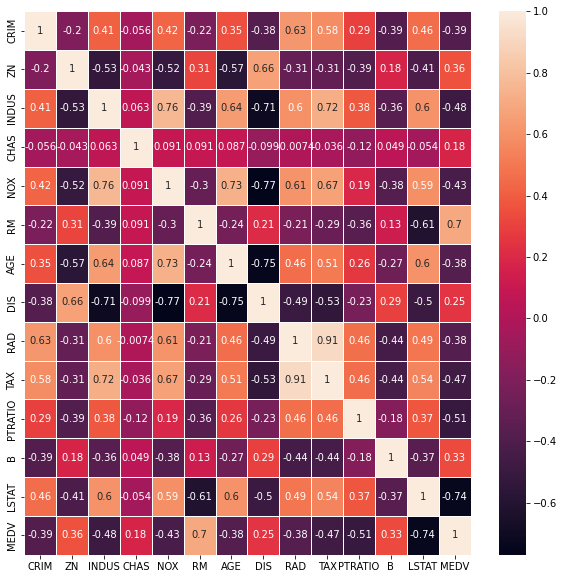

In [10]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [11]:
y=df["MEDV"]

In [12]:
y.shape

(506,)

In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/home/pict/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


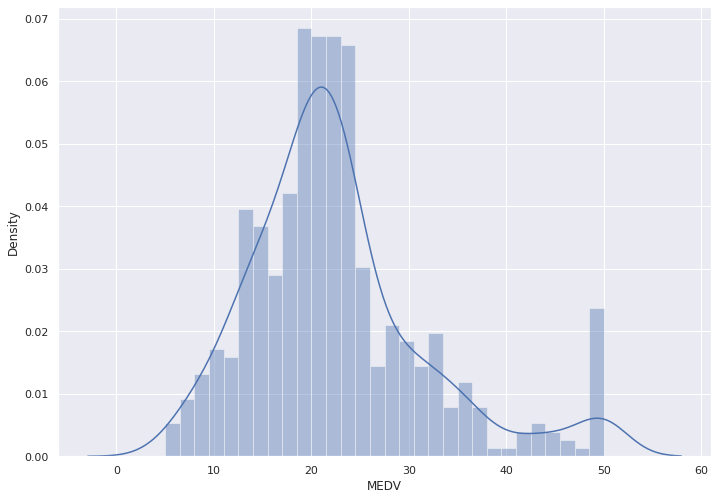

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y, bins=30)
plt.show()

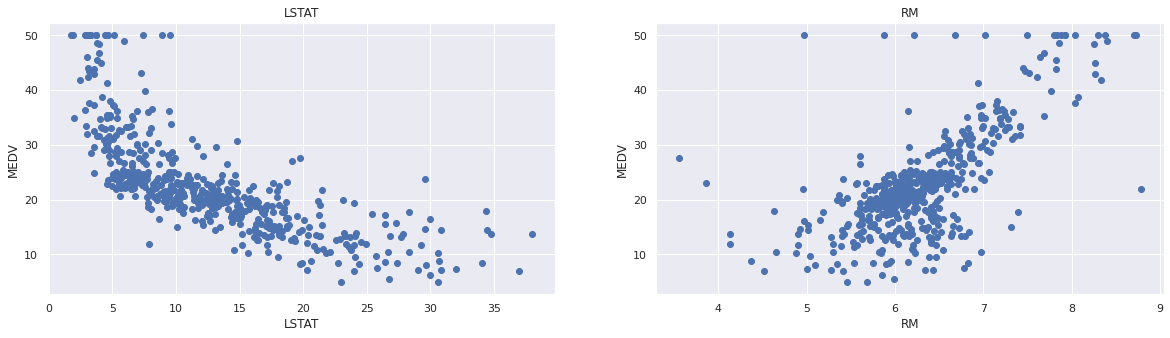

In [15]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = y

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [16]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape) # printing the number of data rows in X_train.
print(X_test.shape) 
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

Slope: 9.102108981180306
Intercept-y: -34.67062077643854


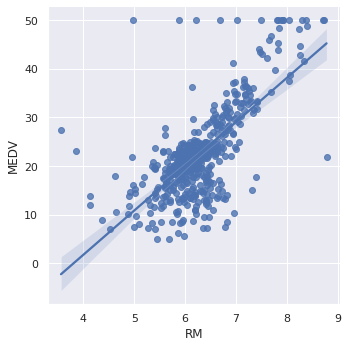

In [27]:
# printing the lineplot using sns.lmplot
from scipy import stats
sns.lmplot(x ='RM', y ='MEDV', data = df)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['RM'],df['MEDV'])
print("Slope:", slope)
print("Intercept-y:",intercept)

In [29]:
# predicting our model on test data, and evaluating the scores.
from sklearn.metrics import r2_score

y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print("\n")

# model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.365657134224422
R2 score is 0.6618625964841893


The model performance for testing set
--------------------------------------
RMSE is 6.114172522817781
R2 score is 0.5409084827186417


In [34]:
print(y_test_predict)

[26.28587773 24.25377886 24.42060228 13.11754087 22.49511785 22.99636043
 21.40735689 23.1439176  15.86631602 24.49894913 15.66714802 18.85052667
 19.48253539  3.98290593 37.34092175 31.60596506 23.5941266  33.2950621
 28.69055638 22.88162089 26.85271393 20.89975988 20.81250528 27.14537125
 21.08017113  9.74333537 20.15512287 17.56350171 37.2052103  18.6688415
 18.528333   20.17796936 23.8988013  21.75587854 25.59651746 18.79694526
 11.792485   22.93730323 19.61654119 14.43528526 24.42127312 19.031016
 24.1741034  14.58361474 26.48547198 25.55656793 17.94458882 20.14812616
  4.60378383 26.93655721 20.33112961 16.17879073 21.66465634 38.61474899
 16.81321483 18.53552994 19.74880245 20.57255588 21.52884614 17.87655368
 23.69717903 21.63170868 31.22593617 29.7494804  18.25853524 29.24595764
 21.12607982 17.92429807 20.78992128 21.71570023 22.97757512 24.99783344
 27.81490106 30.83789397 28.15437976  3.33100173 38.28491117 23.87265013
 25.75226475 19.10463599 27.66100495 22.15569627 19.444

In [20]:
# training the linear regression model from scratch with the preprocessed data.
linear_regression(X_train, Y_train, X_test, Y_test, 0.4, 500)

IndexError: tuple index out of range